## This is a sample Machine Learning project that exemplifies how to use multiple ML non-supervised techniques, on one same dataset, when you have different types of variables - qualitative and quantitative - to analyse altogether, using Python, Pandas, Numpy, Scipy, Scikit-learn, Factor-Analyzer, Sympy, Pingouin, PyShp, Prince, Matplotlib, Seaborn and Plotly

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("dark_background")
import seaborn as sns
import plotly.express as px
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from scipy.stats import chi2_contingency
import plotly.graph_objects as go
import prince
import os
import plotly.io as pio
if os.getenv("GITHUB_ACTIONS") == "true":
    pio.renderers.default = "png"
else:
    pio.renderers.default='colab'
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

- the formulas shown at this notebook have been taken from the following reference:

    FÁVERO, L. P.; BELFIORE, P. Manual de Análise de Dados: Estatística e Machine Learning com Excel®, SPSS®, Stata®, R® e Python®. 2ª edição, 1288 p. Brasil: ccGEN LTC, 2024.
    
    Available in Brazil at:
    
    https://www.amazon.com.br/Manual-An-C3-A1lise-Dados-Estat-C3-ADstica-Learning-dp-8595159920/dp/8595159920

## Use Case Scenario and Data - Real Estate Price Evaluation: Correspondence + Factorial (PCA) Analysis

In this sample use case, we have observations with 16 real estate features, some qualitative and others quantitative. We wanna summarize those lots of variables into some few feature components, in order that we may evaluate the value of each estate (observation), in a comparable way (ranking).

In this case, we try a Correspondence Analysis (MCA) with the >2 qualitative variables, then we use the MCA output coordinates as quantitative inputs, along with the original quantitative variables, at a Factorial Analysis, in order to generate the quantitative ranking of factorial scores of the observations.

For other examples of how to use multiple ML techniques on one same dataset, when you have variables or data that cannot be applied directly into one ML technique alone, please see the other use cases at this repository:<br>
Cluster + Correspondence Analysis:<br>
[https://github.com/danielpm1982/sample-ml-multiple-unsupervised-technique-analysis/blob/master/cluster-correspondence-analysis-client-segmentation.ipynb](https://github.com/danielpm1982/sample-ml-multiple-unsupervised-technique-analysis/blob/master/cluster-correspondence-analysis-client-segmentation.ipynb)<br>
Factorial (PCA) + Correspondence Analysis:<br>
[https://github.com/danielpm1982/sample-ml-multiple-unsupervised-technique-analysis/blob/master/pca-correspondence-analysis-pisa-scores.ipynb](https://github.com/danielpm1982/sample-ml-multiple-unsupervised-technique-analysis/blob/master/pca-correspondence-analysis-pisa-scores.ipynb)<br>

And for simpler examples and detailed info about each individual non-supervised technique used at this repository, check out these other repos, first:<br>
Cluster Analysis:<br>
[https://github.com/danielpm1982/sample-ml-clustering](https://github.com/danielpm1982/sample-ml-clustering)<br>
Factorial Analysis (PCA):<br>
[https://github.com/danielpm1982/sample-ml-pca-factorial-analysis](https://github.com/danielpm1982/sample-ml-pca-factorial-analysis)<br>
Correspondence Analysis (SCA and MCA):<br>
[https://github.com/danielpm1982/sample-ml-correspondence-analysis](https://github.com/danielpm1982/sample-ml-correspondence-analysis)

In [2]:
# reading and displaying our dataset
real_estate_df = pd.read_excel("real_estate.xlsx")
real_estate_df

,land_size_sqm,house_size_sqm,no_of_rooms,no_of_bathrooms,large_living_room,parking_space,front_garden,swimming_pool,distance_to_school,wall_fence,house_age,water_front,distance_to_supermarket_km,crime_rate_index,room_size_class,property_value
0,201,177,3,1,No,Yes,Yes,No,3.3,Yes,10,No,6.8,0.90,Zero,165432
1,196,182,4,3,Yes,Yes,No,Yes,1.2,Yes,11,No,4.1,1.42,One,187043
2,198,182,4,4,Yes,Yes,No,Yes,5.9,No,20,No,2.1,4.12,One,148658
3,178,166,2,3,No,Yes,No,No,5.9,No,5,No,0.7,4.36,Zero,123785
4,183,165,3,1,Yes,Yes,No,No,3.8,Yes,8,No,0.7,0.42,Zero,156470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4949,297,261,4,4,Yes,Yes,Yes,Yes,2.9,Yes,20,No,4.1,3.99,Two,235882
4950,302,282,4,2,Yes,Yes,Yes,Yes,3.8,Yes,12,Yes,4.8,2.09,Two,290995
4951,153,147,3,4,Yes,Yes,No,No,3.3,Yes,7,No,4.7,3.98,Three,106428
4952,180,158,2,1,No,Yes,No,Yes,2.2,No,1,No,3.4,3.75,Two,107579


## Correspondence Analysis (MCA)

In [3]:
# selecting only qualitative variables as inputs for Correspondence Analysis
real_estate_quali_df = real_estate_df[['large_living_room', 
                     'parking_space', 
                     'front_garden',
                     'swimming_pool',
                     'wall_fence',
                     'water_front',
                     'room_size_class']]
real_estate_quali_df

,large_living_room,parking_space,front_garden,swimming_pool,wall_fence,water_front,room_size_class
0,No,Yes,Yes,No,Yes,No,Zero
1,Yes,Yes,No,Yes,Yes,No,One
2,Yes,Yes,No,Yes,No,No,One
3,No,Yes,No,No,No,No,Zero
4,Yes,Yes,No,No,Yes,No,Zero
...,...,...,...,...,...,...,...
4949,Yes,Yes,Yes,Yes,Yes,No,Two
4950,Yes,Yes,Yes,Yes,Yes,Yes,Two
4951,Yes,Yes,No,No,Yes,No,Three
4952,No,Yes,No,Yes,No,No,Two


In [4]:
# variable's categories' frequency count
print(real_estate_quali_df['large_living_room'].value_counts())
print(real_estate_quali_df['parking_space'].value_counts())
print(real_estate_quali_df['front_garden'].value_counts())
print(real_estate_quali_df['swimming_pool'].value_counts())
print(real_estate_quali_df['wall_fence'].value_counts())
print(real_estate_quali_df['water_front'].value_counts())
print(real_estate_quali_df['room_size_class'].value_counts())

large_living_room
Yes    3586
No     1368
Name: count, dtype: int64
parking_space
Yes    3784
No     1170
Name: count, dtype: int64
front_garden
Yes    3109
No     1845
Name: count, dtype: int64
swimming_pool
Yes    3060
No     1894
Name: count, dtype: int64
wall_fence
Yes    3123
No     1831
Name: count, dtype: int64
water_front
No     4713
Yes     241
Name: count, dtype: int64
room_size_class
Two      1779
One      1460
Three    1198
Zero      517
Name: count, dtype: int64


In [5]:
# We have 7 variables and a lot of combinations 2 on 2, for being displayed and tested at our contingency tables. We may elect the 
# most obvious variable to be related to all others, and check if that actually is associated to at least one other variable, in 
# order to confirm that we may proceed with all variables at our analysis or discard the eventual variables that do not relate to 
# any other 
# Let's check out the 'large_living_room' variable associations to all others:
table_mca_1 = chi2_contingency(pd.crosstab(real_estate_quali_df['large_living_room'],real_estate_quali_df['parking_space']))
table_mca_2 = chi2_contingency(pd.crosstab(real_estate_quali_df['large_living_room'], real_estate_quali_df['front_garden']))
table_mca_3 = chi2_contingency(pd.crosstab(real_estate_quali_df['large_living_room'], real_estate_quali_df['swimming_pool']))
table_mca_4 = chi2_contingency(pd.crosstab(real_estate_quali_df['large_living_room'], real_estate_quali_df['wall_fence']))
table_mca_5 = chi2_contingency(pd.crosstab(real_estate_quali_df['large_living_room'], real_estate_quali_df['water_front']))
table_mca_6 = chi2_contingency(pd.crosstab(real_estate_quali_df['large_living_room'], real_estate_quali_df['room_size_class']))
print(f"p-value: {round(table_mca_1[1], 4)}")
print(f"p-value: {round(table_mca_2[1], 4)}")
print(f"p-value: {round(table_mca_3[1], 4)}")
print(f"p-value: {round(table_mca_4[1], 4)}")
print(f"p-value: {round(table_mca_5[1], 4)}")
print(f"p-value: {round(table_mca_6[1], 4)}")

# All p-values < 0.05, therefore, large_living_room is associated to all other variables, and, as such, there's no variable not
# associated to any of the others. All qualitative variables, thus, should be included at the Correspondence Analysis that follows.

p-value: 0.0
p-value: 0.0
p-value: 0.0
p-value: 0.0
p-value: 0.0031
p-value: 0.0


In [6]:
# eliminating "_" from variables name for not messing up with the later split process at the perceptual map generation phase
print(real_estate_quali_df.columns)
real_estate_quali_df.columns = real_estate_quali_df.columns.str.replace("_", "-")
print(real_estate_quali_df.columns)

Index(['large_living_room', 'parking_space', 'front_garden', 'swimming_pool',
       'wall_fence', 'water_front', 'room_size_class'],
      dtype='object')
Index(['large-living-room', 'parking-space', 'front-garden', 'swimming-pool',
       'wall-fence', 'water-front', 'room-size-class'],
      dtype='object')


In [7]:
# in MCA, the max dimensions are the number of total categories - the number of variables (at the qualitative variables table)
# instantiating the mca object based initially on max dimensions
max_dim = 16-7
mca_df = prince.MCA(n_components=max_dim).fit(real_estate_quali_df)

In [8]:
# extracting the eigenvalues (absolute, relative and cumulative)
eigenvalues_summary_df = mca_df.eigenvalues_summary
eigenvalues_summary_df

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,0.354,27.50%,27.50%
1,0.146,11.36%,38.86%
2,0.143,11.12%,49.98%
3,0.140,10.91%,60.89%
4,0.122,9.46%,70.35%
5,0.107,8.29%,78.64%
6,0.098,7.61%,86.25%
7,0.096,7.44%,93.69%
8,0.081,6.31%,100.00%


In [9]:
# calculating the average inertia (eigenvalue)
avg_inertia = mca_df.eigenvalues_summary["eigenvalue"].astype("float").sum()/max_dim
print(f"Average inertia: {avg_inertia}")

# we should select all lambdas (dimensions) with inertia equal or superior to this average inertia, for criating the perceptual 
# map, so we'll choose the first three dimensions
print(f"Partial inertia: {mca_df.eigenvalues_summary["eigenvalue"].loc[0:2].astype("float").sum()} : {mca_df.eigenvalues_summary["% of variance (cumulative)"].loc[2]}")

Average inertia: 0.143
Partial inertia: 0.643 : 49.98%


In [10]:
# re-instantiating mca object for first 3 dimensions
mca2_df = prince.MCA(n_components=3).fit(real_estate_quali_df)

In [11]:
# obtaining the principal and standard coordinates (from burt and binary frequencies' tables) for variables' categories
principal_coordinates = mca2_df.column_coordinates(real_estate_quali_df) 
standard_coordinates = principal_coordinates/np.sqrt(mca2_df.eigenvalues_)
standard_coordinates

,0,1,2
large-living-room__No,1.642017,-0.250120,-0.096431
large-living-room__Yes,-0.626403,0.095417,0.036787
parking-space__No,2.027691,0.169884,0.098519
parking-space__Yes,-0.626955,-0.052527,-0.030462
front-garden__No,1.530090,-0.050982,0.094808
front-garden__Yes,-0.908014,0.030255,-0.056263
swimming-pool__No,1.491699,0.152553,-0.001992
swimming-pool__Yes,-0.923294,-0.094423,0.001233
wall-fence__No,1.459860,0.094822,-0.114719
wall-fence__Yes,-0.855909,-0.055594,0.067259


In [12]:
# obtaining observations' coordinates
observation_coordinates = mca2_df.row_coordinates(real_estate_quali_df)
observation_coordinates.rename(columns={0: 'dim1_acm', 1: 'dim2_acm', 2: 'dim3_acm'}, inplace=True)
print(observation_coordinates)

      dim1_acm  dim2_acm  dim3_acm
0     0.369421  0.317828  0.427218
1    -0.141592 -0.447006 -0.029203
2     0.189233 -0.425518 -0.055200
3     1.048545  0.327711  0.422802
4     0.393661  0.355585  0.467830
...        ...       ...       ...
4949 -0.599403  0.104366 -0.416069
4950 -0.657489  1.374289 -0.389508
4951 -0.006458 -0.044800  0.513703
4952  0.403782  0.064887 -0.439515
4953 -0.599403  0.104366 -0.416069

[4954 rows x 3 columns]


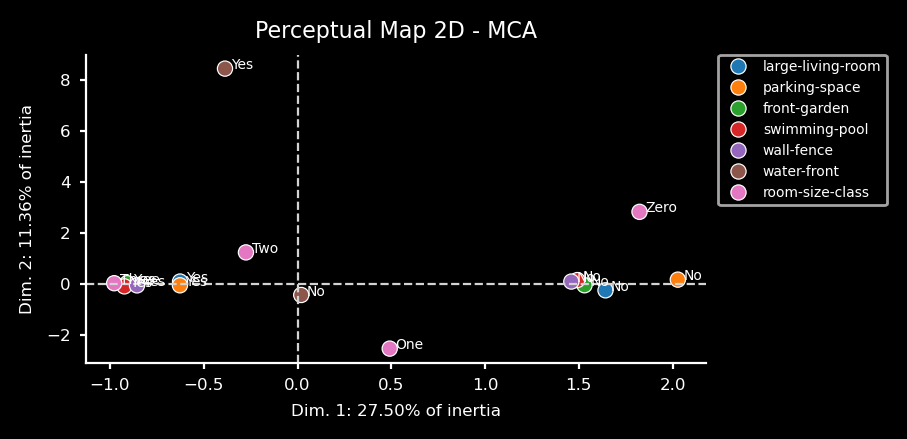

In [13]:
chart = standard_coordinates.reset_index()

var_chart = pd.Series(chart['index'].str.split('_', expand=True).iloc[:,0])

categ_name=[]
for col in real_estate_quali_df:
    categ_name.append(real_estate_quali_df[col].sort_values(ascending=True).unique())
    categories = pd.DataFrame(categ_name).stack().reset_index()

chart_df_mca = pd.DataFrame({'category': chart['index'],
                             'obs_x': chart[0],
                             'obs_y': chart[1],
                             'variable': var_chart,
                             'category_id': categories[0]})

plt.figure(figsize=(4, 2), dpi=200)

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'] + 0.03, point['y'] - 0.02, point['val'], fontsize=5)

label_point(x = chart_df_mca['obs_x'],
            y = chart_df_mca['obs_y'],
            val = chart_df_mca['category_id'],
            ax = plt.gca())

sns.scatterplot(data=chart_df_mca, x='obs_x', y='obs_y', hue='variable', s=30, palette='tab10')
sns.despine(top=True, right=True, left=False, bottom=False)
plt.axhline(y=0, color='lightgrey', ls='--', linewidth=0.8)
plt.axvline(x=0, color='lightgrey', ls='--', linewidth=0.8)
plt.tick_params(size=2, labelsize=6)
plt.legend(
    loc='upper left',
    bbox_to_anchor=(1.02, 1),
    borderaxespad=0,
    fancybox=True,
    shadow=False,
    fontsize=5
)
plt.title("Perceptual Map 2D - MCA", fontsize=8)
plt.xlabel(f"Dim. 1: {eigenvalues_summary_df.iloc[0,1]} of inertia", fontsize=6)
plt.ylabel(f"Dim. 2: {eigenvalues_summary_df.iloc[1,1]} of inertia", fontsize=6)
plt.show()

In [14]:
# Creating and showing a 3D Perceptual Map
# Here, we're using the standard coordinates (from the Binary table of frequencies), and therefore, we may also plot the
# observation_coordinates, derived, by default (at the api), from the standard coordinates, as well.

# preparing the chart df for plotting data from
chart = standard_coordinates.reset_index()
var_chart = pd.Series(chart['index'].str.split('_', expand=True).iloc[:,0])
category_name=[]
for col in real_estate_quali_df:
    category_name.append(real_estate_quali_df[col].sort_values(ascending=True).unique())
    categories = pd.DataFrame(categ_name).stack().reset_index()
chart_df_mca = pd.DataFrame({'variable_category': chart['index'],
                             'obs_x': chart[0],
                             'obs_y': chart[1],
                             'obs_z': chart[2],
                             'variable': var_chart,
                             'category': categories[0]})

# preparing color mapping according to unique variables
unique_vars = chart_df_mca["variable"].unique()
color_map = {var: color for var, color in zip(unique_vars, px.colors.qualitative.Plotly)}
chart_df_mca['color'] = chart_df_mca['variable'].map(color_map)

# creating the Figure, adding each variable's trace with categories (1 color per trace or variable) and plotting the categories 
# from the chart above
fig = go.Figure()
for var in unique_vars:
    subset = chart_df_mca[chart_df_mca['variable'] == var]
    fig.add_trace(go.Scatter3d(
        x=subset["obs_x"],
        y=subset["obs_y"],
        z=subset["obs_z"],
        mode='markers+text',
        text=subset["category"],
        textposition='top center',
        textfont=dict(size=10),
        name=var,
        marker=dict(size=5, color=color_map[var])
    ))

# adding another trace for plotting observations from the observation_coordinates df
fig.add_trace(go.Scatter3d(
        x=observation_coordinates["dim1_acm"],
        y=observation_coordinates["dim2_acm"],
        z=observation_coordinates["dim3_acm"],
        mode='markers',
        # text="",
        # textposition='top center',
        # textfont=dict(size=10),
        name="estate units",
        marker=dict(size=2, color="purple")
    ))

# adjusting graph visual details
fig.update_layout(
    title={
        'text': "Perceptual Map 3D - MCA<br><span style='font-size:12px'>(standard coordinates - binary table frequencies)",
        'x': 0.5,
        'xanchor': 'center',
        'font': dict(size=14),
        'pad': dict(t=0, b=0)
    },
    legend=dict(
        itemsizing='constant',
        font=dict(size=11),
    ),
    scene=dict(
        xaxis=dict(title=dict(text=f"Dim. 1: {eigenvalues_summary_df.iloc[0,1]} of inertia",font=dict(size=10)),tickfont=dict(size=9)),
        yaxis=dict(title=dict(text=f"Dim. 2: {eigenvalues_summary_df.iloc[1,1]} of inertia",font=dict(size=10)),tickfont=dict(size=9)),
        zaxis=dict(title=dict(text=f"Dim. 3: {eigenvalues_summary_df.iloc[2,1]} of inertia",font=dict(size=10)),tickfont=dict(size=9))
    ),
    width=700,
    height=500,
    margin=dict(
        l=80,
        r=80,
        t=90,
        b=50
    )
)

fig.show()

## Factorial Analysis (PCA)

In [15]:
# we may now use the output from the technique before (MCA) as input to the Factorial Analysis (PCA), specifically the 
# quantitative coordinates of the observations... along with the other quantitative variables we originally had at our dataset

In [16]:
# selecting the original quantitative variables from our original dataset
real_estate_quanti_df = real_estate_df[['land_size_sqm',
                      'house_size_sqm',
                      'no_of_rooms',
                      'no_of_bathrooms',
                      'distance_to_school',
                      'house_age',
                      'distance_to_supermarket_km',
                      'crime_rate_index']]
real_estate_quanti_df

,land_size_sqm,house_size_sqm,no_of_rooms,no_of_bathrooms,distance_to_school,house_age,distance_to_supermarket_km,crime_rate_index
0,201,177,3,1,3.3,10,6.8,0.90
1,196,182,4,3,1.2,11,4.1,1.42
2,198,182,4,4,5.9,20,2.1,4.12
3,178,166,2,3,5.9,5,0.7,4.36
4,183,165,3,1,3.8,8,0.7,0.42
...,...,...,...,...,...,...,...,...
4949,297,261,4,4,2.9,20,4.1,3.99
4950,302,282,4,2,3.8,12,4.8,2.09
4951,153,147,3,4,3.3,7,4.7,3.98
4952,180,158,2,1,2.2,1,3.4,3.75


In [17]:
# concatenating the original quantitative variables with the new quantitative variables, derived from the MCA of the qualitative
# variables. All qualitative data we had initially, and that we couldn't use directly at PCA, we now have as quantitative 
# data, the coordinates of the observations (on each MCA dimension), from the Correspondence Analysis  of that qualitative initial 
# data. We can now do a PCA on all of the data - we only have quantitative data now - 11 variables.

real_estate_quanti_df = pd.concat([real_estate_quanti_df, observation_coordinates], axis=1)
real_estate_quanti_df

,land_size_sqm,house_size_sqm,no_of_rooms,no_of_bathrooms,distance_to_school,house_age,distance_to_supermarket_km,crime_rate_index,dim1_acm,dim2_acm,dim3_acm
0,201,177,3,1,3.3,10,6.8,0.90,0.369421,0.317828,0.427218
1,196,182,4,3,1.2,11,4.1,1.42,-0.141592,-0.447006,-0.029203
2,198,182,4,4,5.9,20,2.1,4.12,0.189233,-0.425518,-0.055200
3,178,166,2,3,5.9,5,0.7,4.36,1.048545,0.327711,0.422802
4,183,165,3,1,3.8,8,0.7,0.42,0.393661,0.355585,0.467830
...,...,...,...,...,...,...,...,...,...,...,...
4949,297,261,4,4,2.9,20,4.1,3.99,-0.599403,0.104366,-0.416069
4950,302,282,4,2,3.8,12,4.8,2.09,-0.657489,1.374289,-0.389508
4951,153,147,3,4,3.3,7,4.7,3.98,-0.006458,-0.044800,0.513703
4952,180,158,2,1,2.2,1,3.4,3.75,0.403782,0.064887,-0.439515


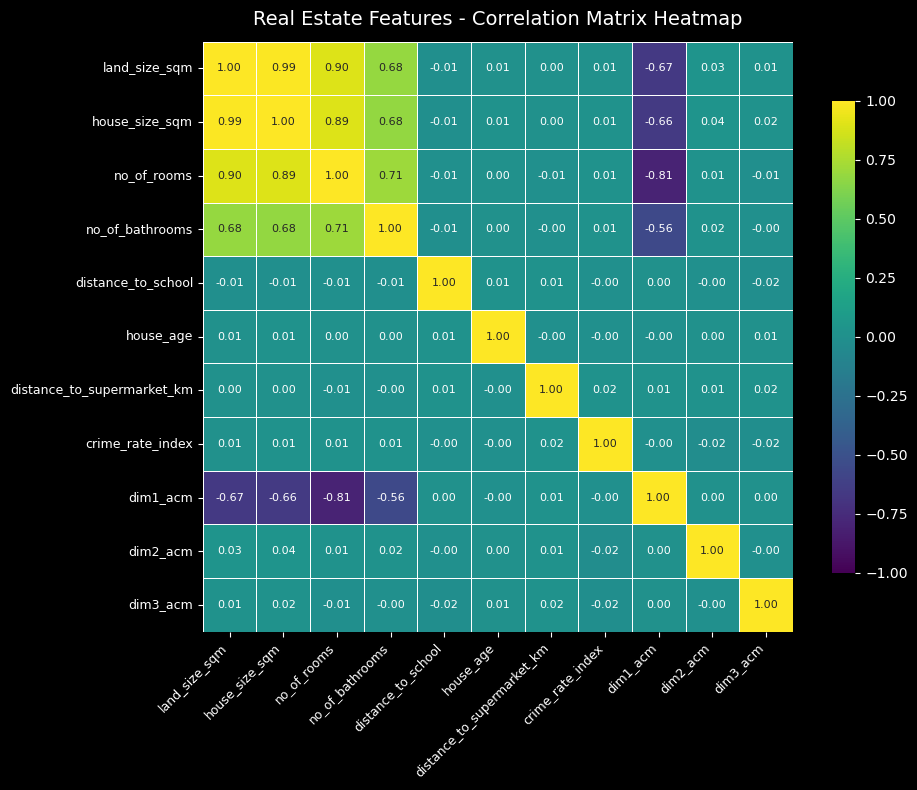

In [18]:
# ploting the correlation matrix into a heatmap graph
correlation_matrix = real_estate_quanti_df.corr()
plt.figure(figsize=(10, 8), dpi=100)  # square figure
ax = sns.heatmap(
    correlation_matrix,
    cmap="viridis",
    vmin=-1,
    vmax=1,
    center=0,
    square=True,
    linewidths=0.5,
    annot=True,
    fmt=".2f",
    annot_kws={"size":8},   # bigger numbers
    cbar_kws={"shrink":0.8}
)
plt.title("Real Estate Features - Correlation Matrix Heatmap", fontsize=14, pad=12)
plt.xticks(rotation=45, ha="right", fontsize=9)
plt.yticks(rotation=0, fontsize=9)
plt.tight_layout()
plt.show()

In [19]:
# calculating if there's is association between variables - Sphericit's Bartlet test
bartlett, p_value = calculate_bartlett_sphericity(real_estate_quanti_df)
print(f'Qui² Bartlett: {round(bartlett, 2)}')
print(f'p-valor: {round(p_value, 4)}')

Qui² Bartlett: 37370.65
p-valor: 0.0


In [20]:
# observe that we have some pairs of variables highly correlated (positively and negatively) at the correlation matrix heatmap.
# We also have a very significant qui2 test.
# Therefore, at least some of the variables from our actual dataset will be possible to be reduced to fewer PCA components, namely
# those the highest pearson's correlations (either positive or negative).
# We may thus proceed with the analysis.

In [21]:
# instantiating the fa object, innitially for the max components
fa = FactorAnalyzer(n_factors=11, method='principal', rotation=None).fit(real_estate_quanti_df)

In [22]:
# getting the eigenvalues - absolute, relative and cumulative - for all variables
eigenvalues_variances = fa.get_factor_variance()
eigen_table = pd.DataFrame(eigenvalues_variances)
eigen_table.columns = [f"Component {i+1}" for i, v in enumerate(eigen_table.columns)]
eigen_table.index = ['Absolute Variance','Relative Variance', 'Accumulated Variance']
eigen_table = eigen_table.T
print(eigen_table)

              Absolute Variance  Relative Variance  Accumulated Variance
Component 1            4.041091           0.367372              0.367372
Component 2            1.034258           0.094023              0.461395
Component 3            1.017137           0.092467              0.553862
Component 4            1.014713           0.092247              0.646109
Component 5            1.001885           0.091080              0.737190
Component 6            0.984917           0.089538              0.826727
Component 7            0.948643           0.086240              0.912968
Component 8            0.457201           0.041564              0.954531
Component 9            0.410816           0.037347              0.991878
Component 10           0.080766           0.007342              0.999221
Component 11           0.008572           0.000779              1.000000


In [23]:
# Applying the Kaiser or latent root criteria, by selecting as dimensions only the ones with absolute variance > 1, i.e., the
# five first components (dimensions) only. Re-instantiating the fa object for those 5 components, only.
fa = FactorAnalyzer(n_factors=5, method='principal', rotation=None).fit(real_estate_quanti_df)
eigenvalues_variances = fa.get_factor_variance()
eigen_table = pd.DataFrame(eigenvalues_variances)
eigen_table.columns = [f"Component {i+1}" for i, v in enumerate(eigen_table.columns)]
eigen_table.index = ['Absolute Variance','Relative Variance', 'Accumulated Variance']
eigen_table = eigen_table.T
print(eigen_table)

             Absolute Variance  Relative Variance  Accumulated Variance
Component 1           4.041091           0.367372              0.367372
Component 2           1.034258           0.094023              0.461395
Component 3           1.017137           0.092467              0.553862
Component 4           1.014713           0.092247              0.646109
Component 5           1.001885           0.091080              0.737190


In [24]:
# As we have 5 dimensions at our CPA analysis, we can't display that into a graph. We'll work only with table data then.

In [25]:
# calculating the loadings (pearson correlation between original variables and current selected components)
loadings = fa.loadings_
loading_table = pd.DataFrame(loadings)
loading_table.columns = [f"C{i+1} loadings" for i, v in enumerate(loading_table.columns)]
loading_table.index = real_estate_quanti_df.columns
print(loading_table)

                            C1 loadings  C2 loadings  C3 loadings  \
land_size_sqm                  0.951882     0.015900     0.012204   
house_size_sqm                 0.949468     0.019309     0.012562   
no_of_rooms                    0.963536    -0.020983    -0.010666   
no_of_bathrooms                0.798637    -0.010489    -0.003046   
distance_to_school            -0.011682    -0.300788    -0.254290   
house_age                      0.006827     0.071553    -0.105834   
distance_to_supermarket_km    -0.003950    -0.054401     0.716301   
crime_rate_index               0.013346    -0.643152     0.384940   
dim1_acm                      -0.816118     0.020411     0.016775   
dim2_acm                       0.029461     0.497422    -0.108011   
dim3_acm                       0.002864     0.522532     0.517328   

                            C4 loadings  C5 loadings  
land_size_sqm                  0.009065    -0.004385  
house_size_sqm                 0.009379    -0.001521  
no_of_

In [26]:
# calculating communalities (1 - sq of loadings of each variable on all considered components)
communalities = fa.get_communalities()
communalities_table = pd.DataFrame(communalities)
communalities_table.columns = ['Communalities']
communalities_table.index = real_estate_quanti_df.columns
print(communalities_table)

                            Communalities
land_size_sqm                    0.906582
house_size_sqm                   0.902110
no_of_rooms                      0.928989
no_of_bathrooms                  0.638006
distance_to_school               0.608933
house_age                        0.762099
distance_to_supermarket_km       0.787265
crime_rate_index                 0.568156
dim1_acm                         0.667346
dim2_acm                         0.649060
dim3_acm                         0.690538


In [27]:
# calculating the factorial score for each observation per component
factorial_scores = pd.DataFrame(fa.transform(real_estate_quanti_df))
factorial_scores.columns =  [f"C{i+1} score" for i, v in enumerate(factorial_scores.columns)]
factorial_scores

,C1 score,C2 score,C3 score,C4 score,C5 score
0,-0.761287,1.655338,1.245701,0.865670,-0.661654
1,-0.199452,0.241060,0.223374,-0.984058,0.482862
2,-0.181792,-1.258179,-0.662086,0.747072,1.630968
3,-0.970837,0.170676,-0.391321,-0.106990,-0.398851
4,-0.838824,1.991592,-1.004792,-0.398598,-0.046471
...,...,...,...,...,...
4949,0.521005,-0.640830,-0.242018,0.700475,0.340854
4950,0.374527,1.452707,-0.701155,1.716637,-2.397559
4951,-0.448415,0.190457,1.414462,-0.299472,-0.057402
4952,-1.018717,-0.682731,-0.144634,-1.157886,-1.636168


In [28]:
# getting the adjusted weights of each quanti variable at each component (transform method has already been called, so the weights 
# have been already calculated)
weights = fa.weights_
weights_df = pd.DataFrame(weights)
weights_df.columns = [f"C{i+1} weights" for i, v in enumerate(weights_df.columns)]
weights_df.index = real_estate_quanti_df.columns
weights_df_transposed = weights_df.T
weights_df_transposed

,land_size_sqm,house_size_sqm,no_of_rooms,no_of_bathrooms,distance_to_school,house_age,distance_to_supermarket_km,crime_rate_index,dim1_acm,dim2_acm,dim3_acm
C1 weights,0.235551,0.234953,0.238435,0.197629,-0.002891,0.001689,-0.000977,0.003303,-0.201955,0.007290,0.000709
C2 weights,0.015373,0.018669,-0.020288,-0.010141,-0.290825,0.069183,-0.052599,-0.621849,0.019735,0.480946,0.505224
C3 weights,0.011999,0.012351,-0.010486,-0.002995,-0.250006,-0.104051,0.704233,0.378455,0.016493,-0.106191,0.508612
C4 weights,0.008933,0.009243,-0.005306,-0.004377,0.662318,0.492625,0.430746,-0.071926,0.013847,0.332749,-0.048104
C5 weights,-0.004376,-0.001518,0.002243,-0.006752,-0.044543,0.702847,-0.282594,0.028712,-0.020029,-0.523506,0.383308


In [29]:
# mounting the factorial score expression for each component
for index, row in weights_df_transposed.iterrows():
    print(f"{index[:2]}: ({round(row["land_size_sqm"],6)})*ZX1i + ({round(row['house_size_sqm'],6)})*ZX2i + ({round(row['no_of_rooms'],6)})*ZX3i + ({round(row['no_of_bathrooms'],6)})*ZX4i + ({round(row['distance_to_school'],6)})*ZX5i + ({round(row['house_age'],6)})*ZX6i + ({round(row['distance_to_supermarket_km'],6)})*ZX7i + ({round(row['crime_rate_index'],6)})*ZX8i + ({round(row['dim1_acm'],6)})*ZX9i + ({round(row['dim2_acm'],6)})*ZX10i + ({round(row['dim3_acm'],6)})*ZX11i\n")

C1: (0.235551)*ZX1i + (0.234953)*ZX2i + (0.238435)*ZX3i + (0.197629)*ZX4i + (-0.002891)*ZX5i + (0.001689)*ZX6i + (-0.000977)*ZX7i + (0.003303)*ZX8i + (-0.201955)*ZX9i + (0.00729)*ZX10i + (0.000709)*ZX11i

C2: (0.015373)*ZX1i + (0.018669)*ZX2i + (-0.020288)*ZX3i + (-0.010141)*ZX4i + (-0.290825)*ZX5i + (0.069183)*ZX6i + (-0.052599)*ZX7i + (-0.621849)*ZX8i + (0.019735)*ZX9i + (0.480946)*ZX10i + (0.505224)*ZX11i

C3: (0.011999)*ZX1i + (0.012351)*ZX2i + (-0.010486)*ZX3i + (-0.002995)*ZX4i + (-0.250006)*ZX5i + (-0.104051)*ZX6i + (0.704233)*ZX7i + (0.378455)*ZX8i + (0.016493)*ZX9i + (-0.106191)*ZX10i + (0.508612)*ZX11i

C4: (0.008933)*ZX1i + (0.009243)*ZX2i + (-0.005306)*ZX3i + (-0.004377)*ZX4i + (0.662318)*ZX5i + (0.492625)*ZX6i + (0.430746)*ZX7i + (-0.071926)*ZX8i + (0.013847)*ZX9i + (0.332749)*ZX10i + (-0.048104)*ZX11i

C5: (-0.004376)*ZX1i + (-0.001518)*ZX2i + (0.002243)*ZX3i + (-0.006752)*ZX4i + (-0.044543)*ZX5i + (0.702847)*ZX6i + (-0.282594)*ZX7i + (0.028712)*ZX8i + (-0.020029)*ZX9i + 

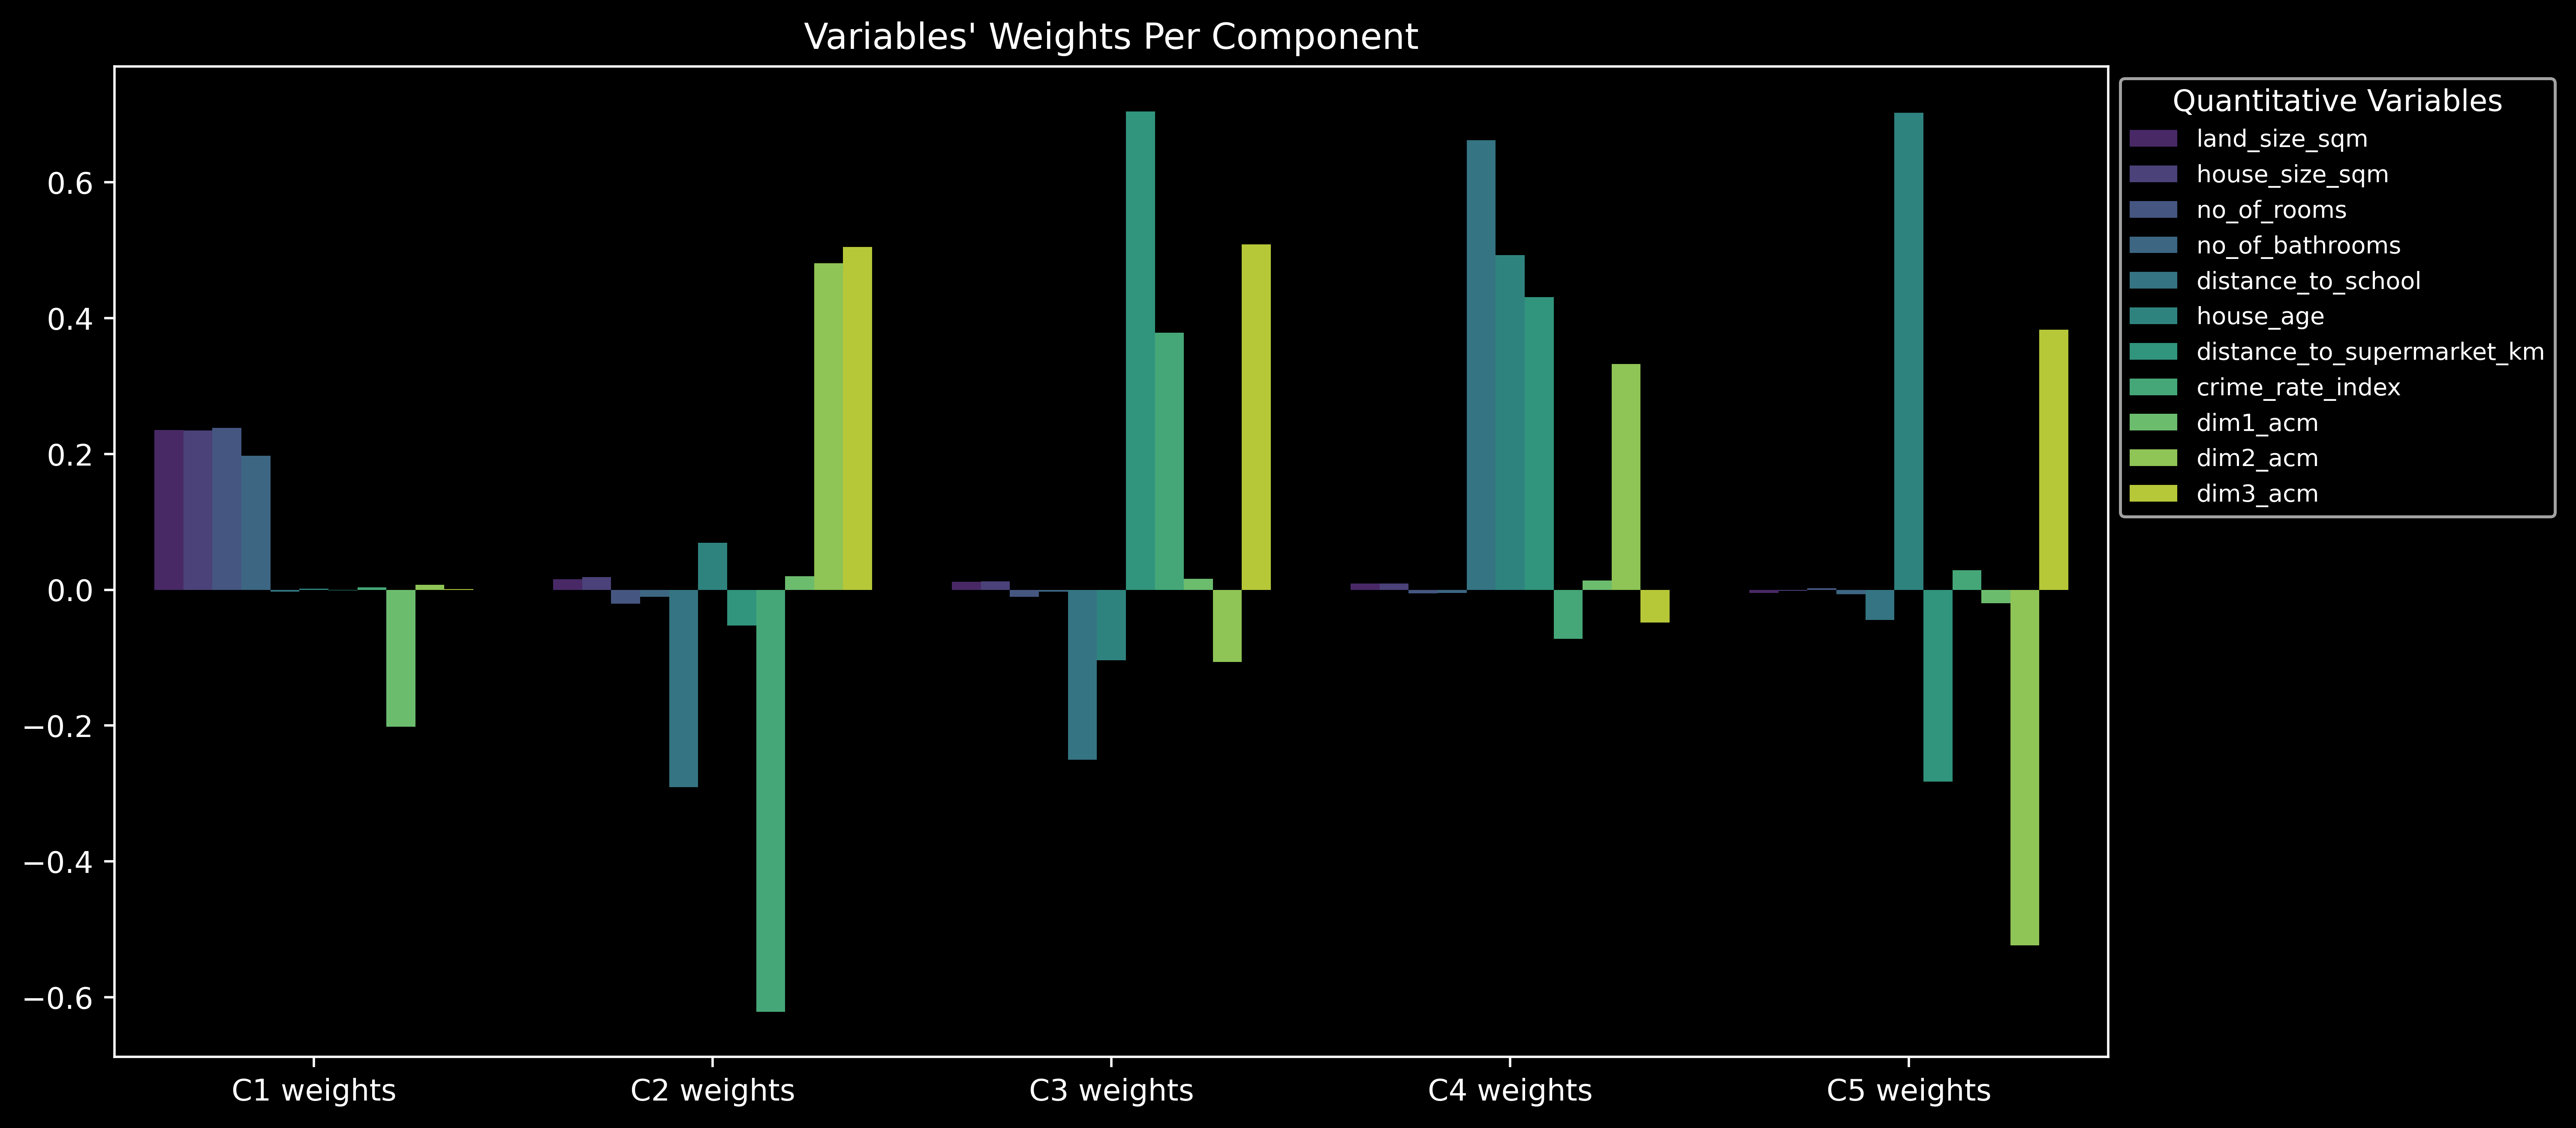

In [30]:
# showing each component with its weights on a bar graph
weights_graph = weights_df.reset_index()
weights_graph = weights_graph.melt(id_vars='index')
plt.figure(figsize=(12,6), dpi=500)
sns.barplot(data=weights_graph, x='variable', y='value', hue='index', palette='viridis')
plt.legend(title='Quantitative Variables', bbox_to_anchor=(1,1), fontsize = '8')
plt.title("Variables' Weights Per Component", fontsize='12')
plt.xlabel(xlabel=None)
plt.ylabel(ylabel=None)
plt.show()

In [31]:
# adding the factorial scores to the original database
real_estate_final = pd.concat([real_estate_df.reset_index(drop=True), factorial_scores], axis=1)
real_estate_final

,land_size_sqm,house_size_sqm,no_of_rooms,no_of_bathrooms,large_living_room,parking_space,front_garden,swimming_pool,distance_to_school,wall_fence,...,water_front,distance_to_supermarket_km,crime_rate_index,room_size_class,property_value,C1 score,C2 score,C3 score,C4 score,C5 score
0,201,177,3,1,No,Yes,Yes,No,3.3,Yes,...,No,6.8,0.90,Zero,165432,-0.761287,1.655338,1.245701,0.865670,-0.661654
1,196,182,4,3,Yes,Yes,No,Yes,1.2,Yes,...,No,4.1,1.42,One,187043,-0.199452,0.241060,0.223374,-0.984058,0.482862
2,198,182,4,4,Yes,Yes,No,Yes,5.9,No,...,No,2.1,4.12,One,148658,-0.181792,-1.258179,-0.662086,0.747072,1.630968
3,178,166,2,3,No,Yes,No,No,5.9,No,...,No,0.7,4.36,Zero,123785,-0.970837,0.170676,-0.391321,-0.106990,-0.398851
4,183,165,3,1,Yes,Yes,No,No,3.8,Yes,...,No,0.7,0.42,Zero,156470,-0.838824,1.991592,-1.004792,-0.398598,-0.046471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4949,297,261,4,4,Yes,Yes,Yes,Yes,2.9,Yes,...,No,4.1,3.99,Two,235882,0.521005,-0.640830,-0.242018,0.700475,0.340854
4950,302,282,4,2,Yes,Yes,Yes,Yes,3.8,Yes,...,Yes,4.8,2.09,Two,290995,0.374527,1.452707,-0.701155,1.716637,-2.397559
4951,153,147,3,4,Yes,Yes,No,No,3.3,Yes,...,No,4.7,3.98,Three,106428,-0.448415,0.190457,1.414462,-0.299472,-0.057402
4952,180,158,2,1,No,Yes,No,Yes,2.2,No,...,No,3.4,3.75,Two,107579,-1.018717,-0.682731,-0.144634,-1.157886,-1.636168


In [32]:
# we may now do a weighted summation of the factorial scores, with respect to the relative variance of their PCA components, in 
# order to sort the observations according to those scores. The higher the final score, for each particular observation, the 
# better the real state features of that real estate unit, therefore, the higher its value and the higher it should be its price.

In [33]:
real_estate_final['RANKING'] = 0

score_column_names = ["C1 score", "C2 score", "C3 score", "C4 score", "C5 score"]
relative_variance_c1 = eigen_table.loc["Component 1"]["Relative Variance"]
relative_variance_c2 = eigen_table.loc["Component 2"]["Relative Variance"]
relative_variance_c3 = eigen_table.loc["Component 3"]["Relative Variance"]
relative_variance_c4 = eigen_table.loc["Component 4"]["Relative Variance"]
relative_variance_c5 = eigen_table.loc["Component 5"]["Relative Variance"]

for i in range(0,real_estate_final.index.size):
    c1_score_value = real_estate_final.loc[i][score_column_names[0]]
    c2_score_value = real_estate_final.loc[i][score_column_names[1]]
    c3_score_value = real_estate_final.loc[i][score_column_names[1]]
    c4_score_value = real_estate_final.loc[i][score_column_names[1]]
    c5_score_value = real_estate_final.loc[i][score_column_names[1]]
    real_estate_final.at[i, 'RANKING'] = c1_score_value*relative_variance_c1+c2_score_value*relative_variance_c2+c3_score_value*relative_variance_c3+c4_score_value*relative_variance_c4+c5_score_value*relative_variance_c5
real_estate_final.sort_values(by="RANKING", ascending=False)

,land_size_sqm,house_size_sqm,no_of_rooms,no_of_bathrooms,large_living_room,parking_space,front_garden,swimming_pool,distance_to_school,wall_fence,...,distance_to_supermarket_km,crime_rate_index,room_size_class,property_value,C1 score,C2 score,C3 score,C4 score,C5 score,RANKING
3245,767,678,8,9,Yes,Yes,Yes,Yes,5.8,Yes,...,4.6,0.06,Three,692086,3.911571,2.939863,-0.129448,2.195390,-1.335771,2.524214
3144,668,551,8,6,No,Yes,Yes,Yes,0.7,Yes,...,2.1,3.26,Three,574528,2.904503,2.545526,0.227669,0.103380,-0.316285,2.008413
2744,462,442,7,6,Yes,Yes,Yes,Yes,4.9,Yes,...,6.5,0.05,Three,419709,2.109448,3.006915,0.532932,2.581926,-1.115376,1.886962
4295,436,405,7,8,Yes,Yes,Yes,Yes,2.5,Yes,...,5.9,1.68,Three,396899,2.212480,2.795970,0.913973,1.813872,-0.625031,1.846802
2733,796,692,8,9,Yes,Yes,Yes,Yes,0.3,Yes,...,5.3,3.40,Three,609388,3.983580,0.941602,1.789216,-0.393581,0.893945,1.811676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3940,130,112,1,1,No,Yes,No,No,6.1,No,...,1.1,5.69,Two,69406,-1.512809,-1.742775,-1.158388,0.204490,-0.538608,-1.200273
4410,145,135,1,2,No,No,No,No,6.1,No,...,3.2,5.56,One,61318,-1.472698,-1.796480,0.131563,0.650201,0.887887,-1.205398
680,135,135,1,1,Yes,No,No,No,6.1,No,...,0.6,5.79,One,91917,-1.507469,-1.782886,-0.652507,-0.274424,0.675055,-1.213144
2660,126,119,1,2,Yes,No,No,No,5.8,No,...,6.7,5.81,One,63714,-1.448015,-1.962090,1.607238,0.630344,-0.629608,-1.257575
